# **Principal Component Analysis**
---

- Copyright (c) Antoine Jacquier (QuantLearn Ltd), 2022. All rights reserved

- Author: Antoine Jacquier <Jack.QuantLearn@gmail.com>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import random, linalg
%matplotlib inline

### Create a two-dimensional Gaussian sample

In [2]:
dimension = 5
mu = [0.]*dimension
sTemp = random.rand(dimension, dimension)
sigma = np.dot(sTemp,sTemp.transpose()) ## Generate some positive semi-definite natrix
n = 1000
X = np.random.multivariate_normal(mu, sigma, n)
Sigma = np.cov(X.T)

### Compute the eigenvalue decomposition

In [3]:
e, v = np.linalg.eig(Sigma)

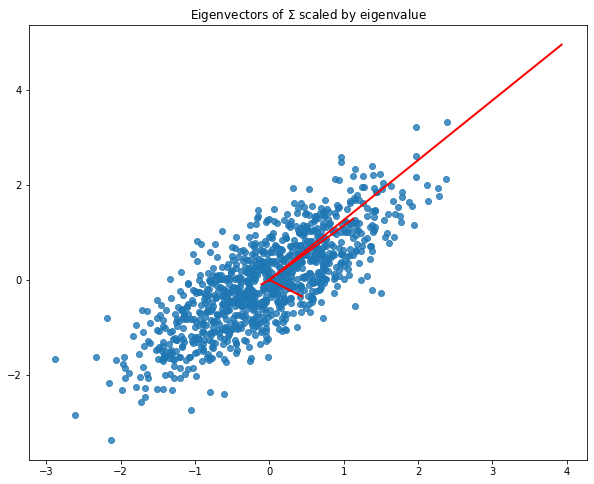

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.title('Eigenvectors of $\Sigma$ scaled by eigenvalue')
plt.show()

### Compute explained variance ratios

In [5]:
D = np.diag(e) ## Diagonal matrix of eigenvalues

In [6]:
print("Trace(D) = ", D.trace(), " = ", Sigma.trace(), "=Trace(Sigma)")
for i in range(1, dimension+1):
    f = 100.*D[i-1, i-1]/D.trace()
    print("Variance explained by factor %d: %.2f" %(i,f), "%")

Trace(D) =  5.534943319881124  =  5.534943319881119 =Trace(Sigma)
Variance explained by factor 1: 80.55 %
Variance explained by factor 2: 13.52 %
Variance explained by factor 3: 3.59 %
Variance explained by factor 4: 2.02 %
Variance explained by factor 5: 0.31 %


# PCA on Treasury rates

Interesting paper by Credit Suisse: https://plus.credit-suisse.com/rpc4/ravDocView?docid=kv66a7

Data from https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2015
    

In [7]:
import datetime as dt
from urllib.request import urlretrieve
import pandas as pd

In [9]:
yields = pd.read_csv("Rates.txt", sep='\t', index_col=0)
yields = yields.drop(columns=["2 Mo"])
yields.index = pd.DatetimeIndex(data=yields.index)
yields.head()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2015-01-02,0.02,0.02,0.11,0.25,0.66,1.07,1.61,1.92,2.12,2.41,2.69
2015-01-05,0.02,0.03,0.10,0.26,0.68,1.06,1.57,1.85,2.04,2.32,2.60
2015-01-06,0.02,0.03,0.10,0.25,0.65,1.02,1.50,1.78,1.97,2.25,2.52
2015-01-07,0.02,0.03,0.09,0.25,0.62,1.00,1.47,1.76,1.96,2.25,2.52
2015-01-08,0.01,0.03,0.08,0.23,0.62,1.00,1.50,1.81,2.03,2.33,2.59


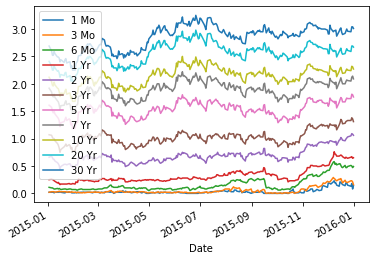

In [10]:
yields.plot()

In [72]:
returns = yields.copy()
for n in list(yields):
    returns[n] = returns[n].diff()
    #print n, np.mean(returns[n]), np.std(returns[n])
    returns[n] = (returns[n] - np.mean(returns[n])) / np.std(returns[n])
returns = returns.dropna()
returns.head()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2015-01-05,-0.026513,0.618055,-0.647140,0.423487,0.542341,-0.255348,-0.795614,-1.284298,-1.484661,-1.622273,-1.664109
2015-01-06,-0.026513,-0.036664,-0.085387,-0.584815,-0.931412,-0.954294,-1.383505,-1.284298,-1.300460,-1.265886,-1.481801
2015-01-07,-0.026513,-0.036664,-0.647140,-0.080664,-0.931412,-0.488330,-0.599650,-0.375768,-0.195253,-0.018532,-0.023335
2015-01-08,-0.578865,-0.036664,-0.647140,-1.088966,-0.047160,-0.022366,0.576134,0.896174,1.278356,1.407015,1.252822
2015-01-09,0.525839,-0.691384,-0.085387,-0.584815,-0.931412,-0.954294,-0.991578,-1.102592,-0.932058,-0.731306,-0.752568


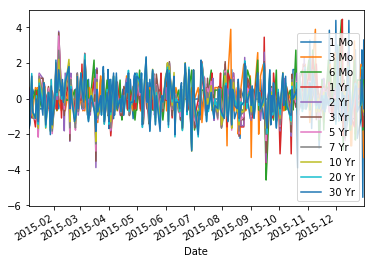

In [73]:
returns.plot();

In [74]:
Sigma = returns.cov()
Sigma

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
1 Mo,1.004016,-0.000976,0.127324,0.189090,0.019014,0.016460,0.027073,0.013376,0.040158,0.041407,0.055187
3 Mo,-0.000976,1.004016,0.493153,0.229013,0.205968,0.229515,0.183002,0.184923,0.175408,0.142691,0.154454
6 Mo,0.127324,0.493153,1.004016,0.470786,0.276574,0.287697,0.238169,0.208418,0.186057,0.138713,0.130025
1 Yr,0.189090,0.229013,0.470786,1.004016,0.598334,0.594442,0.554127,0.512221,0.471263,0.384904,0.370183
2 Yr,0.019014,0.205968,0.276574,0.598334,1.004016,0.926421,0.891368,0.830531,0.765035,0.654073,0.625377
3 Yr,0.016460,0.229515,0.287697,0.594442,0.926421,1.004016,0.955396,0.910673,0.844964,0.728529,0.703802
5 Yr,0.027073,0.183002,0.238169,0.554127,0.891368,0.955396,1.004016,0.980428,0.944039,0.857202,0.841075
7 Yr,0.013376,0.184923,0.208418,0.512221,0.830531,0.910673,0.980428,1.004016,0.980587,0.921071,0.907961
10 Yr,0.040158,0.175408,0.186057,0.471263,0.765035,0.844964,0.944039,0.980587,1.004016,0.966833,0.960249
20 Yr,0.041407,0.142691,0.138713,0.384904,0.654073,0.728529,0.857202,0.921071,0.966833,1.004016,0.989675


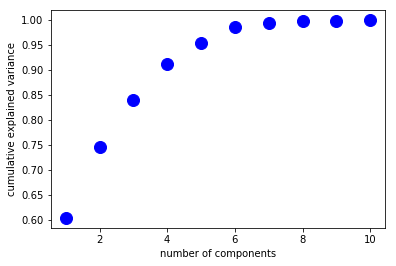

In [75]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

n = 10
pca = PCA(n_components=n)
pca.fit(returns)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,svd_solver='auto', tol=0.0, whiten=False)
plt.plot(range(1,n+1), np.cumsum(pca.explained_variance_ratio_), "bo", markersize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()